# Downloads

In [1]:
!python -m pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
!pip install terratorch

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.0/849.0 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.3/28.3 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 158.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 175.4 MB/s eta 0:00:00
   ━━━━━━

In [1]:
!pip install transformers -U

In [2]:
!pip install pytorch-lightning

# Package imports

In [3]:
import os

import timm
import torch

import terratorch

from terratorch.datasets import HLSBands
from terratorch.models import PrithviModelFactory

import shutil
import matplotlib.pyplot as plt
import rioxarray as rio
from terratorch.datamodules import GenericNonGeoSegmentationDataModule

from terratorch.models.model import AuxiliaryHead
from terratorch.tasks import SemanticSegmentationTask

from lightning.pytorch import Trainer
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor, ModelCheckpoint, RichProgressBar
from lightning.pytorch.loggers import TensorBoardLogger

import numpy as np
import rasterio

from matplotlib.patches import Patch
from skimage.filters import threshold_otsu
from sklearn.cluster import KMeans

from scipy.ndimage import gaussian_filter, binary_erosion, binary_dilation
from skimage.filters import threshold_local

import numpy as np
from torchvision.transforms import Compose, Normalize, ToTensor

import yaml

import tensorflow as tf

import pytorch_lightning as pl

from PIL import Image

import tarfile

from pytorch_lightning.callbacks import Callback
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms

from sklearn.model_selection import train_test_split

import glob

import torchvision.datasets as datasets

from terratorch.cli_tools import LightningInferenceModel

import time

import torch.nn.functional as F

from sklearn.metrics import roc_curve, auc

import random

import matplotlib.colors as mcolors


wxc_downscaling not installed
wxc_downscaling not installed


# Burn scar dataset

In [4]:
!wget https://huggingface.co/datasets/ibm-nasa-geospatial/hls_burn_scars/resolve/main/hls_burn_scars.tar.gz

--2025-01-28 13:03:01--  https://huggingface.co/datasets/ibm-nasa-geospatial/hls_burn_scars/resolve/main/hls_burn_scars.tar.gz
Resolving huggingface.co (huggingface.co)... 3.165.160.59, 3.165.160.11, 3.165.160.61, ...
Connecting to huggingface.co (huggingface.co)|3.165.160.59|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/94/b7/94b798ca7f1a80030d49e8443baa3e5aae5b6f45001a43e43366a793db9c4080/4e6f99a75cb2c500547b20662a15cbd531dc421376f815e91846ea542798e8e6?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27hls_burn_scars.tar.gz%3B+filename%3D%22hls_burn_scars.tar.gz%22%3B&response-content-type=application%2Fgzip&Expires=1738072981&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczODA3Mjk4MX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy85NC9iNy85NGI3OThjYTdmMWE4MDAzMGQ0OWU4NDQzYmFhM2U1YWFlNWI2ZjQ1MDAxYTQzZTQzMzY2YTc5M2RiOWM0MDgwLzRlNmY5OWE3NWNiMmM1MDA1NDdiMjA2NjJhMTVj

In [5]:
def extract_tar_gz(source_tar_gz_path, extraction_path):
    with tarfile.open(source_tar_gz_path, 'r:gz') as tar:
        tar.extractall(path=extraction_path)
    print("Extraction complete.")

source_tar_gz_path = 'hls_burn_scars.tar.gz'
extraction_path = 'extracted_files'

extract_tar_gz(source_tar_gz_path, extraction_path)

Extraction complete.


In [6]:
target_dirs = {
    'validation_images': 'validation/images',
    'validation_masks': 'validation/masks',
    'training_images': 'training/images',
    'training_masks': 'training/masks',
    'testing_images': 'test/images',
    'testing_masks': 'test/masks'
}

for key, path in target_dirs.items():
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"Directory created: {path}")
    else:
        print(f"Directory already exists: {path}")

Directory created: validation/images
Directory created: validation/masks
Directory created: training/images
Directory created: training/masks
Directory created: test/images
Directory created: test/masks


In [7]:
for key, path in target_dirs.items():
    os.makedirs(path, exist_ok=True)

def categorize_file(file_path):
    category_part = 'masks' if 'mask' in file_path.split('/')[-1] else 'images'

    if '/validation/' in file_path:
        category_prefix = 'validation_'
    elif '/training/' in file_path:
        category_prefix = 'training_'
    else:
        print(f"Unknown category for file: {file_path}")
        return None

    return f"{category_prefix}{category_part}"

for root, dirs, files in os.walk(extraction_path):
    for file in files:
        file_path = os.path.join(root, file)
        category = categorize_file(file_path)
        if category:
            dest_path = os.path.join(target_dirs[category], file)
            os.rename(file_path, dest_path)
        else:
            print(f"Uncategorized file: {file}")

def list_directory_contents():
    for category, path in target_dirs.items():
        print(f"Contents of {path}:")
        try:
            contents = os.listdir(path)
            for content in contents:
                print(content)
        except FileNotFoundError:
            print("Directory not found, it may be empty.")
        print()

list_directory_contents()

Contents of validation/images:
subsetted_512x512_HLS.S30.T15RVQ.2021063.v1.4_merged.tif
subsetted_512x512_HLS.S30.T15TVN.2019140.v1.4_merged.tif
subsetted_512x512_HLS.S30.T10TGR.2019245.v1.4_merged.tif
subsetted_512x512_HLS.S30.T16RGU.2019127.v1.4_merged.tif
subsetted_512x512_HLS.S30.T16SBD.2020096.v1.4_merged.tif
subsetted_512x512_HLS.S30.T11TPH.2019244.v1.4_merged.tif
subsetted_512x512_HLS.S30.T12TVR.2020281.v1.4_merged.tif
subsetted_512x512_HLS.S30.T16RFU.2021069.v1.4_merged.tif
subsetted_512x512_HLS.S30.T13TDH.2018292.v1.4_merged.tif
subsetted_512x512_HLS.S30.T12TTM.2019244.v1.4_merged.tif
subsetted_512x512_HLS.S30.T16RCU.2020118.v1.4_merged.tif
subsetted_512x512_HLS.S30.T11TLM.2019245.v1.4_merged.tif
subsetted_512x512_HLS.S30.T11SPB.2020241.v1.4_merged.tif
subsetted_512x512_HLS.S30.T14SKE.2018156.v1.4_merged.tif
subsetted_512x512_HLS.S30.T11SLU.2018274.v1.4_merged.tif
subsetted_512x512_HLS.S30.T13SCA.2019227.v1.4_merged.tif
subsetted_512x512_HLS.S30.T12SUD.2020218.v1.4_merged.tif


File remove

In [8]:
files_to_remove = {
    r'training/images/training_index.csv',
    r'validation/images/validation_index.csv'
}

for file_path in files_to_remove:
    try:
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Removed file: {file_path}")
        else:
            print(f"No action needed, file does not exist: {file_path}")
    except Exception as e:
        print(f"Error removing {file_path}: {str(e)}")

Removed file: validation/images/validation_index.csv
Removed file: training/images/training_index.csv


In [9]:
images_dir = 'validation/images'
masks_dir = 'validation/masks'

image_files = os.listdir(images_dir)
mask_files = os.listdir(masks_dir)

image_to_mask = {}

for image in image_files:
    base_name = image.replace('_merged.tif', '.mask.tif')
    if base_name in mask_files:
        image_to_mask[image] = base_name

print(f"Number of images: {len(image_files)}")
print(f"Number of masks: {len(mask_files)}")
print(f"Number of paired files: {len(image_to_mask)}")


Number of images: 264
Number of masks: 264
Number of paired files: 264


In [10]:
images_dir2 = 'training/images'
masks_dir2 = 'training/masks'

image_files2 = os.listdir(images_dir2)
mask_files2 = os.listdir(masks_dir2)

image_to_mask2 = {}

for image2 in image_files2:
    base_name2 = image2.replace('_merged.tif', '.mask.tif')

    if base_name2 in mask_files2:
        image_to_mask2[image2] = base_name2
        #print(f"Paired - Image: {image2} with Mask: {base_name2}")
    #else:
        #print(f"Unpaired - Image: {image2} does not have a corresponding Mask.")

print(f"Number of images: {len(image_files2)}")
print(f"Number of masks: {len(mask_files2)}")
print(f"Number of paired files: {len(image_to_mask2)}")

Number of images: 540
Number of masks: 540
Number of paired files: 540


Splitting

In [11]:
def ensure_directory_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

def move_files_to_test(image_source, mask_source, image_destination, mask_destination, test_size):
    ensure_directory_exists(image_destination)
    ensure_directory_exists(mask_destination)

    image_files = [f for f in os.listdir(image_source) if f.endswith('_merged.tif')]
    mask_files = [f for f in os.listdir(mask_source) if f.endswith('.mask.tif')]

    mask_dict = {f.replace('.mask.tif', ''): f for f in mask_files}

    valid_pairs = []
    for image in image_files:
        base_name = image.replace('_merged.tif', '')
        if base_name in mask_dict:
            valid_pairs.append((image, mask_dict[base_name]))
        else:
            print(f"No mask found for image: {image}")

    if not valid_pairs:
        print("No valid pairs were formed. Exiting function.")
        return

    _, test_pairs = train_test_split(valid_pairs, test_size=test_size)

    for image, mask in test_pairs:
        image_src_path = os.path.join(image_source, image)
        mask_src_path = os.path.join(mask_source, mask)
        if os.path.isfile(image_src_path) and os.path.isfile(mask_src_path):
            shutil.move(image_src_path, os.path.join(image_destination, image))
            shutil.move(mask_src_path, os.path.join(mask_destination, mask))
            print(f"Moved {image} and {mask} to test directories.")
        else:
            print(f"File not found. Check paths: {image_src_path}, {mask_src_path}")

source_image_dir = 'training/images'
source_mask_dir = 'training/masks'
dest_image_dir = 'test/images'
dest_mask_dir = 'test/masks'

test_data_fraction = 0.15
move_files_to_test(source_image_dir, source_mask_dir, dest_image_dir, dest_mask_dir, test_data_fraction)

Moved subsetted_512x512_HLS.S30.T11SPV.2020246.v1.4_merged.tif and subsetted_512x512_HLS.S30.T11SPV.2020246.v1.4.mask.tif to test directories.
Moved subsetted_512x512_HLS.S30.T10TFQ.2018245.v1.4_merged.tif and subsetted_512x512_HLS.S30.T10TFQ.2018245.v1.4.mask.tif to test directories.
Moved subsetted_512x512_HLS.S30.T11SMV.2020249.v1.4_merged.tif and subsetted_512x512_HLS.S30.T11SMV.2020249.v1.4.mask.tif to test directories.
Moved subsetted_512x512_HLS.S30.T16RGU.2019267.v1.4_merged.tif and subsetted_512x512_HLS.S30.T16RGU.2019267.v1.4.mask.tif to test directories.
Moved subsetted_512x512_HLS.S30.T11TMJ.2020247.v1.4_merged.tif and subsetted_512x512_HLS.S30.T11TMJ.2020247.v1.4.mask.tif to test directories.
Moved subsetted_512x512_HLS.S30.T12SYG.2018225.v1.4_merged.tif and subsetted_512x512_HLS.S30.T12SYG.2018225.v1.4.mask.tif to test directories.
Moved subsetted_512x512_HLS.S30.T12SWC.2019225.v1.4_merged.tif and subsetted_512x512_HLS.S30.T12SWC.2019225.v1.4.mask.tif to test directories.

In [12]:
def list_files(directory):
    """Lists all files in the given directory."""
    files = [name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))]
    return files

directory_path = 'test/masks'

files_in_directory = list_files(directory_path)

print(f"There are {len(files_in_directory)} files in the directory '{directory_path}':")
for file_name in files_in_directory:
    print(file_name)

There are 81 files in the directory 'test/masks':
subsetted_512x512_HLS.S30.T11SMT.2020289.v1.4.mask.tif
subsetted_512x512_HLS.S30.T12SWJ.2018238.v1.4.mask.tif
subsetted_512x512_HLS.S30.T13SBS.2020217.v1.4.mask.tif
subsetted_512x512_HLS.S30.T15STU.2018237.v1.4.mask.tif
subsetted_512x512_HLS.S30.T15RUQ.2018094.v1.4.mask.tif
subsetted_512x512_HLS.S30.T10TFR.2018213.v1.4.mask.tif
subsetted_512x512_HLS.S30.T16REV.2019165.v1.4.mask.tif
subsetted_512x512_HLS.S30.T14SQG.2018125.v1.4.mask.tif
subsetted_512x512_HLS.S30.T16RGU.2019267.v1.4.mask.tif
subsetted_512x512_HLS.S30.T11SLT.2018349.v1.4.mask.tif
subsetted_512x512_HLS.S30.T10SEJ.2018220.v1.4.mask.tif
subsetted_512x512_HLS.S30.T12SWC.2019225.v1.4.mask.tif
subsetted_512x512_HLS.S30.T15SUU.2018062.v1.4.mask.tif
subsetted_512x512_HLS.S30.T10SGE.2020217.v1.4.mask.tif
subsetted_512x512_HLS.S30.T15SXB.2019099.v1.4.mask.tif
subsetted_512x512_HLS.S30.T15SXB.2018154.v1.4.mask.tif
subsetted_512x512_HLS.S30.T11TLL.2018245.v1.4.mask.tif
subsetted_512x5

In [13]:
new_directory = 'burn_scar_segmentation_toy'
if not os.path.exists(new_directory):
    os.makedirs(new_directory)

directories_to_move = ['training', 'validation', 'test']

for directory in directories_to_move:
    source_path = directory
    destination_path = os.path.join(new_directory, directory)

    if os.path.exists(source_path):
        shutil.move(source_path, destination_path)
        print(f"Moved {source_path} to {destination_path}")
    else:
        print(f"Directory {source_path} does not exist and cannot be moved.")

print("Organizing complete.")

Moved training to burn_scar_segmentation_toy/training
Moved validation to burn_scar_segmentation_toy/validation
Moved test to burn_scar_segmentation_toy/test
Organizing complete.


Train-Val-Test directories

In [14]:
def print_directory_contents(title, data):
    print(title + ':')
    if isinstance(data, dict):
        for key, path in data.items():
            print(f"{key.upper()} Directory: {path}")
            if os.path.exists(path):
                contents = os.listdir(path)
                print("  Number of items:", len(contents))
            else:
                print("  Directory does not exist")
            print()
    elif isinstance(data, list):
        for path in data:
            print(f"Directory: {path}")
            if os.path.exists(path):
                contents = os.listdir(path)
                print("  Number of items:", len(contents))
            else:
                print("  Directory does not exist")
            print()

train_val_test = [
    "burn_scar_segmentation_toy/training/images",
    "burn_scar_segmentation_toy/validation/images",
    "burn_scar_segmentation_toy/test/images",
]

train_val_test_labels = {
    "train_label_data_root": "burn_scar_segmentation_toy/training/masks",
    "val_label_data_root": "burn_scar_segmentation_toy/validation/masks",
    "test_label_data_root": "burn_scar_segmentation_toy/test/masks",
}

print_directory_contents("Image Directories", train_val_test)
print_directory_contents("Label Directories", train_val_test_labels)

Image Directories:
Directory: burn_scar_segmentation_toy/training/images
  Number of items: 459

Directory: burn_scar_segmentation_toy/validation/images
  Number of items: 264

Directory: burn_scar_segmentation_toy/test/images
  Number of items: 81

Label Directories:
TRAIN_LABEL_DATA_ROOT Directory: burn_scar_segmentation_toy/training/masks
  Number of items: 459

VAL_LABEL_DATA_ROOT Directory: burn_scar_segmentation_toy/validation/masks
  Number of items: 264

TEST_LABEL_DATA_ROOT Directory: burn_scar_segmentation_toy/test/masks
  Number of items: 81



In [15]:
train_val_test = [
    "burn_scar_segmentation_toy/training/images",
    "burn_scar_segmentation_toy/validation/images",
    "burn_scar_segmentation_toy/test/images",
]

train_val_test_labels = {
    "train_label_data_root": "burn_scar_segmentation_toy/training/masks",
    "val_label_data_root": "burn_scar_segmentation_toy/validation/masks",
    "test_label_data_root": "burn_scar_segmentation_toy/test/masks",
}

# Data module

In [16]:
batch_size = 1 #################################################################
num_workers = 2 ################################################################
epochs = 1 #####################################################################
lr = 0.000005 ###################################################################

means = [
    0.033349706741586264,
    0.05701185520536176,
    0.05889748132001316,
    0.2323245113436119,
    0.1972854853760658,
    0.11944914225186566,
]
stds = [
    0.02269135568823774,
    0.026807560223070237,
    0.04004109844362779,
    0.07791732423672691,
    0.08708738838140137,
    0.07241979477437814,
]

print("Train/Val/Test sets:", train_val_test)
print("Train/Val/Test labels:", train_val_test_labels)

datamodule = GenericNonGeoSegmentationDataModule(
    batch_size,
    num_workers,
    *train_val_test,
    "*_merged.tif",  # img grep
    "*.mask.tif",  # label grep
    means,
    stds,
    1,  # num classes
    **train_val_test_labels,
    dataset_bands=[
        HLSBands.BLUE,
        HLSBands.GREEN,
        HLSBands.RED,
        HLSBands.NIR_NARROW,
        HLSBands.SWIR_1,
        HLSBands.SWIR_2,
    ],
    output_bands=[
        HLSBands.BLUE,
        HLSBands.GREEN,
        HLSBands.RED,
        HLSBands.NIR_NARROW,
        HLSBands.SWIR_1,
        HLSBands.SWIR_2,
    ],
    no_data_replace=0,
    no_label_replace=-1,
)

print("DataModule initialized successfully.")

try:
    datamodule.setup("fit")
    print("DataModule setup for 'fit' successfully.")
except Exception as e:
    print("Error during DataModule setup or data printing:", str(e))

Train/Val/Test sets: ['burn_scar_segmentation_toy/training/images', 'burn_scar_segmentation_toy/validation/images', 'burn_scar_segmentation_toy/test/images']
Train/Val/Test labels: {'train_label_data_root': 'burn_scar_segmentation_toy/training/masks', 'val_label_data_root': 'burn_scar_segmentation_toy/validation/masks', 'test_label_data_root': 'burn_scar_segmentation_toy/test/masks'}
DataModule initialized successfully.
DataModule setup for 'fit' successfully.


# Semantic segmentation task

In [18]:
model_args = {
    "backbone": "prithvi_vit_100",
    "decoder": "FCNDecoder",
    "in_channels": 6,
    "num_classes": 2,
    "bands": [
        HLSBands.RED,
        HLSBands.GREEN,
        HLSBands.BLUE,
        HLSBands.NIR_NARROW,
        HLSBands.SWIR_1,
        HLSBands.SWIR_2,
    ],
    "pretrained": True,
    "num_frames": 1,
    "decoder_channels": 128,
    "head_dropout": 0.01 ########################################################
}

print("Model Arguments:", model_args)

task = SemanticSegmentationTask(
    model_args,
    "PrithviModelFactory",
    loss="ce",
    aux_loss={"fcn_aux_head": 0.4},
    lr=lr,
    ignore_index=-1,
    optimizer="AdamW",
    optimizer_hparams={"weight_decay": 0.05},
    aux_heads=[
        AuxiliaryHead(
            "fcn_aux_head",
            "FCNDecoder",         #                       #                       #
            {"decoder_channels": 128, "decoder_in_index": 2, "decoder_num_convs": 2, "head_channel_list": [64]},
        )
    ],
)

print(f"Training dataset size: {len(datamodule.train_dataset)}")
print(f"Validation dataset size: {len(datamodule.val_dataset)}")

accelerator = "gpu"
experiment = "tutorial"
if not os.path.isdir("tutorial_experiments"):
    os.mkdir("tutorial_experiments")
    print("Created directory for experiments.")
default_root_dir = os.path.join("tutorial_experiments", experiment)


checkpoint_callback = ModelCheckpoint(
    dirpath=os.path.join(default_root_dir, "checkpoints"),
    monitor='val/loss',
    filename='{epoch}-{val_loss:.2f}',
    save_top_k=1,
    save_last=True,
    verbose=True,
)

early_stopping_callback = EarlyStopping(monitor=task.monitor, min_delta=0.1, patience=1)
logger = TensorBoardLogger(save_dir=default_root_dir, name=experiment)

trainer = Trainer(
    accelerator=accelerator,
    callbacks=[
        RichProgressBar(),
        checkpoint_callback,
        LearningRateMonitor(logging_interval="epoch"),
    ],
    logger=logger,
    max_epochs=epochs,
    default_root_dir=default_root_dir,
    log_every_n_steps=5,
    check_val_every_n_epoch=1

)
print("Trainer configured")
time. sleep(1)
print("Commencing training")

try:
    trainer.fit(model=task, datamodule=datamodule)
except Exception as e:
  print("Error during training:", str(e))

time. sleep(2)
print("Training process complete.")

Model Arguments: {'backbone': 'prithvi_vit_100', 'decoder': 'FCNDecoder', 'in_channels': 6, 'num_classes': 2, 'bands': [<HLSBands.RED: 'RED'>, <HLSBands.GREEN: 'GREEN'>, <HLSBands.BLUE: 'BLUE'>, <HLSBands.NIR_NARROW: 'NIR_NARROW'>, <HLSBands.SWIR_1: 'SWIR_1'>, <HLSBands.SWIR_2: 'SWIR_2'>], 'pretrained': True, 'num_frames': 1, 'decoder_channels': 128, 'head_dropout': 0.01}


/usr/local/lib/python3.11/dist-packages/terratorch/models/prithvi_model_factory.py:75: UserWarning: PrithviModelFactory is deprecated. Please switch to EncoderDecoderFactory.
  warnings.warn("PrithviModelFactory is deprecated. Please switch to EncoderDecoderFactory.", stacklevel=1)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Training dataset size: 459
Validation dataset size: 264
Trainer configured


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Commencing training


┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ model         │ PixelWiseModel   │ 88.2 M │ train │
│ 1 │ criterion     │ CrossEntropyLoss │      0 │ train │
│ 2 │ train_metrics │ MetricCollection │      0 │ train │
│ 3 │ val_metrics   │ MetricCollection │      0 │ train │
│ 4 │ test_metrics  │ ModuleList       │      0 │ train │
└───┴───────────────┴──────────────────┴────────┴───────┘

Trainable params: 88.2 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 88.2 M                                                                                               
Total estimated model params size (MB): 352                                                                        
Modules in train mode: 341                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 459: 'val/loss' reached 0.23931 (best 0.23931), saving model to '/content/tutorial_experiments/tutorial/checkpoints/epoch=0-val_loss=0.00.ckpt' as top 1
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


Training process complete.


# Testing

In [19]:
print('Commence Testing...')

try:
    test_results = trainer.test(model=task, datamodule=datamodule)
    print("Testing completed successfully. See results above")
except Exception as e:
    print("Error during testing:", str(e))

for result in test_results:
    accuracy = result.get("test/Multiclass Accuracy", None)
    f1_score = result.get("test/Multiclass F1 Score", None)
    loss = result.get("test/loss", None)

    if f1_score is not None:
        print(f"F1 Score: {f1_score:.4f}")
    if accuracy is not None:
        print(f"Accuracy: {accuracy:.4f}")
    if loss is not None:
        print(f"Loss: {loss:.4f}")

print('Epochs = ', epochs)
time. sleep(1)
print('Batch no. = ', batch_size)
time. sleep(1)
print('Learning rate =',lr)
time. sleep(1)
print('Number of workers =', num_workers)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Commence Testing...


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             Test metric             ┃            DataLoader 0             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test/Multiclass_Accuracy       │         0.9501035213470459          │
│      test/Multiclass_F1_Score       │         0.9501034021377563          │
│    test/Multiclass_Jaccard_Index    │         0.8119710683822632          │
│ test/Multiclass_Jaccard_Index_Micro │         0.9049496054649353          │
│       test/decode_head_epoch        │         0.1776059865951538          │
│       test/fcn_aux_head_epoch       │         0.1901039183139801          │
│              test/loss              │         0.2536475956439972          │
│      test/multiclassaccuracy_0      │         0.9806698560714722          │
│      test/multiclassaccuracy_1      │         0.7610277533531189          │
│    test/multiclassjaccardindex_0    │         0.9441930055618286          │
│    test/multiclassjaccardindex_1    │         0.6797491312026978          │
└─────────────────────────────────────┴─────────────────────────────────────┘

Testing completed successfully. See results above
Loss: 0.2536
Epochs =  1
Batch no. =  1
Learning rate = 5e-06
Number of workers = 2


#Input image

In [20]:
!wget https://huggingface.co/spaces/ibm-nasa-geospatial/Prithvi-100M-Burn-scars-demo/resolve/main/subsetted_512x512_HLS.S30.T10TGS.2020245.v1.4_merged.tif

--2025-01-28 13:13:27--  https://huggingface.co/spaces/ibm-nasa-geospatial/Prithvi-100M-Burn-scars-demo/resolve/main/subsetted_512x512_HLS.S30.T10TGS.2020245.v1.4_merged.tif
Resolving huggingface.co (huggingface.co)... 3.165.160.12, 3.165.160.59, 3.165.160.11, ...
Connecting to huggingface.co (huggingface.co)|3.165.160.12|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/1c/09/1c0948cc618defc1284e350591d02a434dcb4e42e8be4eb411c4ccbaae569c03/d4391bef26e6fe7831c9a068a8620eebb21580e17e7430dadac274b6735eef46?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27subsetted_512x512_HLS.S30.T10TGS.2020245.v1.4_merged.tif%3B+filename%3D%22subsetted_512x512_HLS.S30.T10TGS.2020245.v1.4_merged.tif%22%3B&response-content-type=image%2Ftiff&Expires=1738073607&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczODA3MzYwN319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy8xYy8wOS8xYzA5NDhjYzYxO

In [21]:
!mkdir -p /content/project/input_data
!mv subsetted_512x512_HLS.S30.T10TGS.2020245.v1.4_merged.tif /content/project/input_data/

image_path = '/content/project/input_data/subsetted_512x512_HLS.S30.T10TGS.2020245.v1.4_merged.tif'

# Config_file

In [22]:
config_text = """
seed_everything: 0
trainer:
  accelerator: gpu
  num_nodes: 1
  logger:
    class_path: TensorBoardLogger
    init_args:
      save_dir: default_root_dir
      name: default_root_dir
  callbacks:
    - class_path: RichProgressBar
    - class_path: LearningRateMonitor
      init_args:
        logging_interval: epoch
    - class_path: EarlyStopping
      init_args:
        monitor: val/loss
        patience: 10

  max_epochs: 1
  check_val_every_n_epoch: 1
  log_every_n_steps: 50
  enable_checkpointing: true
  default_root_dir: default_root_dir

data:
  class_path: GenericNonGeoSegmentationDataModule
  init_args:
    batch_size: 1
    num_workers: 2
    dataset_bands:
      - BLUE
      - GREEN
      - RED
      - NIR_NARROW
      - SWIR_1
      - SWIR_2
    output_bands:
      - BLUE
      - GREEN
      - RED
      - NIR_NARROW
      - SWIR_1
      - SWIR_2
    rgb_indices:
      - 0
      - 1
      - 2

    no_data_replace: 0
    no_label_replace: -1

    train_data_root: training/images
    val_data_root: validation/images
    test_data_root: test/images

    train_label_data_root: burn_scar_segmentation_toy/training/masks
    val_label_data_root: burn_scar_segmentation_toy/validation/masks
    test_label_data_root: burn_scar_segmentation_toy/test/masks

    img_grep: "*_merged.tif"
    label_grep: "*.mask.tif"
    means:
      - 0.033349706741586264
      - 0.05701185520536176
      - 0.05889748132001316
      - 0.2323245113436119
      - 0.1972854853760658
      - 0.11944914225186566
    stds:
      - 0.02269135568823774
      - 0.026807560223070237
      - 0.04004109844362779
      - 0.07791732423672691
      - 0.08708738838140137
      - 0.07241979477437814
    num_classes: 2

model:
  class_path: terratorch.tasks.SemanticSegmentationTask
  init_args:
    model_args:
      decoder: FCNDecoder
      pretrained: true
      backbone: prithvi_vit_100
      decoder_channels: 128
      in_channels: 6
      bands:
        - BLUE
        - GREEN
        - RED
        - NIR_NARROW
        - SWIR_1
        - SWIR_2
      num_frames: 1
      num_classes: 2
      head_dropout: 0.01
      decoder_num_convs: 4
      head_channel_list:
        - 128
      aux_heads:
        - name: fcn_aux_head
          type: FCNDecoder
          args:
            decoder_channels: 128
            decoder_in_index: 2
            decoder_num_convs: 2
            head_channel_list:
              - 64
    loss: dice
    plot_on_val: 10
    ignore_index: -1
    freeze_backbone: false
    freeze_decoder: false
    model_factory: PrithviModelFactory
    tiled_inference_parameters:
      h_crop: 512
      h_stride: 496
      w_crop: 512
      w_stride: 496
      average_patches: true
optimizer:
  class_path: torch.optim.AdamW
  init_args:
    lr: 1.5e-5
    weight_decay: 0.05
lr_scheduler:
  class_path: ReduceLROnPlateau
  init_args:
    monitor: val/loss

"""

config_file_path = '/home/user/project/config.yaml'
os.makedirs(os.path.dirname(config_file_path), exist_ok=True)

with open(config_file_path, 'w') as file:
    yaml_config = yaml.safe_load(config_text)
    yaml.dump(yaml_config, file, default_flow_style=False)

# Inference

In [23]:
!ls tutorial_experiments/tutorial/checkpoints

'epoch=0-val_loss=0.00.ckpt'   last.ckpt


In [24]:
checkpoint_path = 'tutorial_experiments/tutorial/checkpoints/last.ckpt'

checkpoint = torch.load(checkpoint_path)

print("Keys of the state dictionary:")
for key in checkpoint['state_dict'].keys():
    print(key)

<ipython-input-24-76d5302c7bb1>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


Keys of the state dictionary:
model.encoder._timm_module.cls_token
model.encoder._timm_module.pos_embed
model.encoder._timm_module.patch_embed.proj.weight
model.encoder._timm_module.patch_embed.proj.bias
model.encoder._timm_module.blocks.0.norm1.weight
model.encoder._timm_module.blocks.0.norm1.bias
model.encoder._timm_module.blocks.0.attn.qkv.weight
model.encoder._timm_module.blocks.0.attn.qkv.bias
model.encoder._timm_module.blocks.0.attn.proj.weight
model.encoder._timm_module.blocks.0.attn.proj.bias
model.encoder._timm_module.blocks.0.norm2.weight
model.encoder._timm_module.blocks.0.norm2.bias
model.encoder._timm_module.blocks.0.mlp.fc1.weight
model.encoder._timm_module.blocks.0.mlp.fc1.bias
model.encoder._timm_module.blocks.0.mlp.fc2.weight
model.encoder._timm_module.blocks.0.mlp.fc2.bias
model.encoder._timm_module.blocks.1.norm1.weight
model.encoder._timm_module.blocks.1.norm1.bias
model.encoder._timm_module.blocks.1.attn.qkv.weight
model.encoder._timm_module.blocks.1.attn.qkv.bias


In [25]:
!ls burn_scar_segmentation_toy/test/images

subsetted_512x512_HLS.S30.T10SEJ.2018220.v1.4_merged.tif
subsetted_512x512_HLS.S30.T10SFF.2020250.v1.4_merged.tif
subsetted_512x512_HLS.S30.T10SFF.2021189.v1.4_merged.tif
subsetted_512x512_HLS.S30.T10SGE.2018247.v1.4_merged.tif
subsetted_512x512_HLS.S30.T10SGE.2020217.v1.4_merged.tif
subsetted_512x512_HLS.S30.T10TEK.2018340.v1.4_merged.tif
subsetted_512x512_HLS.S30.T10TEN.2019168.v1.4_merged.tif
subsetted_512x512_HLS.S30.T10TFQ.2018245.v1.4_merged.tif
subsetted_512x512_HLS.S30.T10TFR.2018213.v1.4_merged.tif
subsetted_512x512_HLS.S30.T10TGS.2019195.v1.4_merged.tif
subsetted_512x512_HLS.S30.T10UGU.2018213.v1.4_merged.tif
subsetted_512x512_HLS.S30.T11SKB.2018222.v1.4_merged.tif
subsetted_512x512_HLS.S30.T11SLT.2018349.v1.4_merged.tif
subsetted_512x512_HLS.S30.T11SLT.2021163.v1.4_merged.tif
subsetted_512x512_HLS.S30.T11SMT.2020194.v1.4_merged.tif
subsetted_512x512_HLS.S30.T11SMT.2020249.v1.4_merged.tif
subsetted_512x512_HLS.S30.T11SMT.2020289.v1.4_merged.tif
subsetted_512x512_HLS.S30.T11SM

In [26]:
def get_random_image_mask_pair(image_dir, mask_dir):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.tif')]

    if not image_files:
        raise ValueError("No image files found in the directory")

    random_image_file = random.choice(image_files)

    mask_file = random_image_file.replace('_merged', '.mask')

    image_path = os.path.join(image_dir, random_image_file)
    mask_path = os.path.join(mask_dir, mask_file)

    return image_path, mask_path

image_dir = 'burn_scar_segmentation_toy/test/images'
mask_dir = 'burn_scar_segmentation_toy/test/masks'

image_path, mask_path = get_random_image_mask_pair(image_dir, mask_dir)
print("Selected Image:", image_path)
print("Selected Mask:", mask_path)

Selected Image: burn_scar_segmentation_toy/test/images/subsetted_512x512_HLS.S30.T10SFF.2020250.v1.4_merged.tif
Selected Mask: burn_scar_segmentation_toy/test/masks/subsetted_512x512_HLS.S30.T10SFF.2020250.v1.4.mask.tif


In [27]:
def load_model(checkpoint_path):
    task.load_state_dict(torch.load(checkpoint_path)["state_dict"])
    task.float()
    task.eval()
    return task

task = load_model("/content/tutorial_experiments/tutorial/checkpoints/epoch=0-val_loss=0.00.ckpt")

def prepare_image(image_path):
    with rasterio.open(image_path) as src:
        band_data = [src.read(b) for b in [1, 2, 3, 4, 5, 6]]

        image = np.stack(band_data, axis=0)

        image_tensor = torch.from_numpy(image.astype(np.float32))


        means = np.array([0.033349706741586264, 0.05701185520536176, 0.05889748132001316, 0.2323245113436119, 0.1972854853760658, 0.11944914225186566])
        stds = np.array([0.02269135568823774, 0.026807560223070237, 0.04004109844362779, 0.07791732423672691, 0.08708738838140137, 0.07241979477437814])



        image_tensor = (image_tensor - torch.from_numpy(means[:, None, None])) / torch.from_numpy(stds[:, None, None])
    image_tensor = image_tensor.unsqueeze(0)
    return image_tensor

image_tensor = prepare_image(image_path)

image_tensor = image_tensor.float()
output = task(image_tensor)

def infer(task, image_tensor):
    with torch.no_grad():
        output = task(image_tensor)
        processed_output = post_process(output)
    return processed_output

def post_process(output):
    predict = output.output
    return (predict > 0.67474395).float()

result = infer(task, image_tensor)

<ipython-input-27-bc5e10fd80a6>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  task.load_state_dict(torch.load(checkpoint_path)["state_dict"])


Original shape: torch.Size([1, 6, 512, 512])
Flattened output shape: (262144,)
Flattened labels shape: (262144,)
False Positive Rates: [0.00000000e+00 9.79470302e-06 1.39084783e-03 ... 9.99990205e-01
 1.00000000e+00 1.00000000e+00]
True Positive Rates: [0.         0.         0.         ... 0.99942517 0.99942517 1.        ]
Thresholds: [       inf 0.878909   0.85907876 ... 0.18146855 0.18115205 0.16114534]
ROC AUC Score: 0.06057142102834203


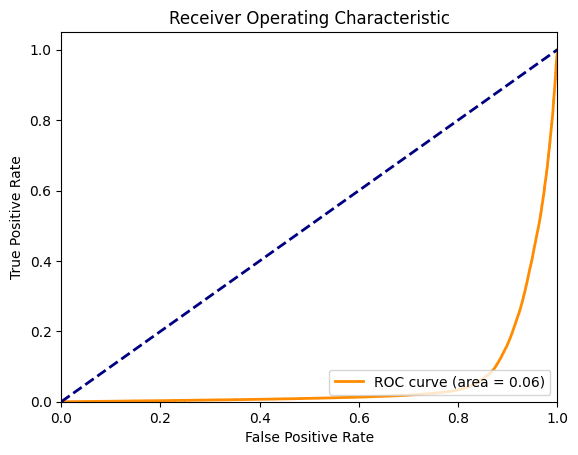

In [28]:
mask_image = Image.open(mask_path)
true_labels = np.array(mask_image)

print("Original shape:", image_tensor.shape)

try:
    model_output = task(image_tensor)

    output_logits = model_output.output.squeeze().select(0, 0)
    output_probs = torch.sigmoid(output_logits)

    output_probs_resized = F.interpolate(output_probs.unsqueeze(0).unsqueeze(0), size=(512, 512), mode='bilinear', align_corners=False)
    output_probs_flatten = output_probs_resized.view(-1).detach().cpu().numpy()

    true_labels_flatten = true_labels.flatten()

    print("Flattened output shape:", output_probs_flatten.shape)
    print("Flattened labels shape:", true_labels_flatten.shape)

    fpr, tpr, thresholds = roc_curve(true_labels_flatten, output_probs_flatten)
    roc_auc = auc(fpr, tpr)

    print("False Positive Rates:", fpr)
    print("True Positive Rates:", tpr)
    print("Thresholds:", thresholds)
    print("ROC AUC Score:", roc_auc)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

except AttributeError as e:
    print("Attribute error:", e)
except Exception as e:
    print("Error processing model output:", e)

In [29]:
output_tensor = output.output

probabilities = F.softmax(output_tensor, dim=1)
predicted_classes = torch.argmax(probabilities, dim=1)

binary_mask = (predicted_classes == 1).int()

print("Binary mask shape:", binary_mask.shape)

Binary mask shape: torch.Size([1, 512, 512])


# Next

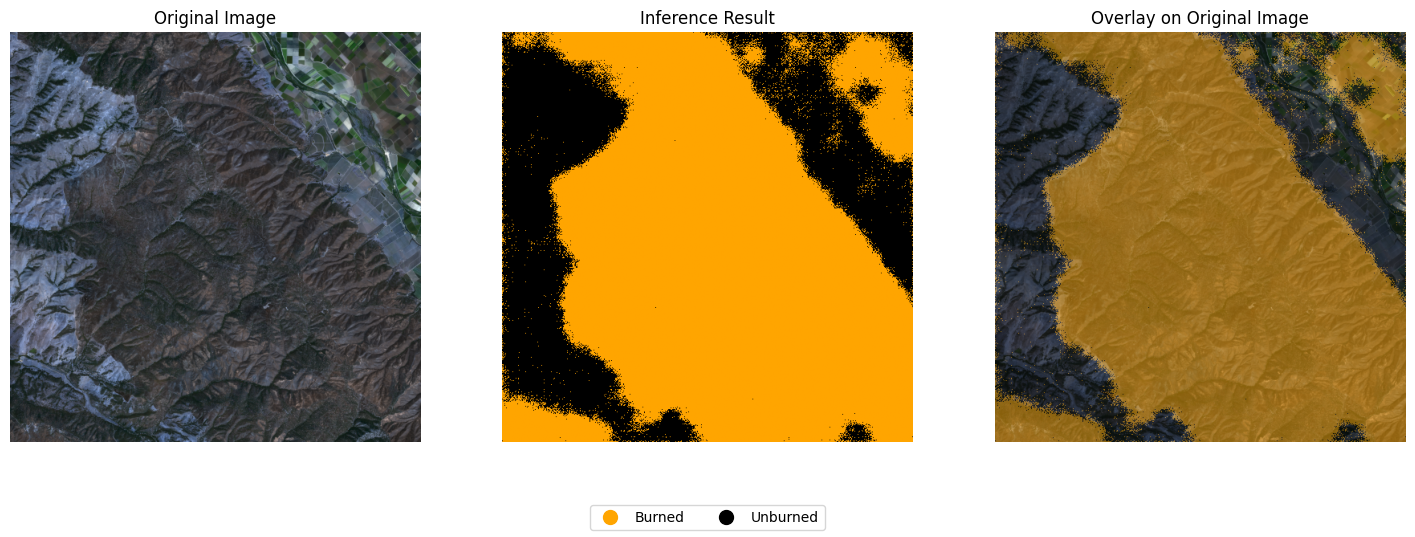

In [30]:
def plot_results(image_path, result):
    with rasterio.open(image_path) as src:
        rgb_image = np.stack([src.read(b) for b in [1, 2, 3]], axis=-1)

    rgb_image = rgb_image.astype(float)
    rgb_max = rgb_image.max(axis=(0, 1), keepdims=True)
    rgb_image /= rgb_max

    mask = result.squeeze().numpy()

    colors = ['orange', 'black']
    labels = ['Burned', 'Unburned']
    cmap = mcolors.ListedColormap(colors)
    bounds = [0, 0.5, 1]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    axes[0].imshow(rgb_image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    im = axes[1].imshow(mask[0], cmap=cmap, norm=norm)
    axes[1].set_title('Inference Result')
    axes[1].axis('off')

    axes[2].imshow(rgb_image)
    axes[2].imshow(mask[0], cmap=cmap, norm=norm, alpha=0.5)
    axes[2].set_title('Overlay on Original Image')
    axes[2].axis('off')

    handles = [plt.Line2D([0], [0], color=cmap.colors[i], marker='o', linestyle='', markersize=10, label=labels[i])
               for i in range(len(labels))]
    fig.legend(handles=handles, loc='lower center', ncol=2)

    plt.show()

plot_results(image_path, result)

# MISC

These are unneccesary but relevant terminals which demonstrate some previously tried methods for making the code work

MAKING OWN MASK

In [ ]:
input_file_name = "subsetted_512x512_HLS.S30.T10TGS.2018285.v1.4_merged.tif"

image = rasterio.open(input_file_name)

red = image.read(3)
red_edge_1 = image.read(5)
red_edge_2 = image.read(6)

ndvi = (red_edge_1.astype(float) - red.astype(float)) / (red_edge_1 + red)

custom_burn_index = (red_edge_2.astype(float) - red.astype(float)) / (red_edge_2 + red)
custom_burn_index_smoothed = gaussian_filter(custom_burn_index, sigma=1)
custom_burn_index_flat = custom_burn_index_smoothed.flatten().reshape(-1, 1)

kmeans = KMeans(n_clusters=20, random_state=0).fit(custom_burn_index_flat)
labels = kmeans.labels_.reshape(custom_burn_index_smoothed.shape)

#burn_threshold = 0.4385
burn_threshold = 0.4385

cluster_means = kmeans.cluster_centers_

burnt_clusters = cluster_means < burn_threshold

burn_scar_mask = np.isin(labels, np.where(burnt_clusters)[0])

block_size = 35
adaptive_thresh = threshold_local(custom_burn_index_smoothed, block_size, offset=0)

burn_scar_mask_threshold = custom_burn_index_smoothed < adaptive_thresh

combined_burn_scar_mask = burn_scar_mask & burn_scar_mask_threshold

cleaned_mask = binary_erosion(combined_burn_scar_mask, structure=np.ones((3, 3)))
cleaned_mask = binary_dilation(cleaned_mask, structure=np.ones((3, 3)))

mask_data = cleaned_mask.astype(np.uint8)
mock_mask_file = "subsetted_512x512_HLS.S30.T10TGS.2018285.v1.4.mask.tif"
transform = image.transform
crs = image.crs

with rasterio.open(
    mock_mask_file, 'w', driver='GTiff', height=mask_data.shape[0],
    width=mask_data.shape[1], count=1, dtype=mask_data.dtype,
    crs=crs, transform=transform
) as mask:
    mask.write(mask_data, 1)

fig, ax = plt.subplots(1, 4, figsize=(24, 6))

input_image = rasterio.open(input_file_name).read([3, 2, 1]).transpose(1, 2, 0)
ax[0].imshow(input_image)
ax[0].set_title('Input Image')

ax[1].imshow(ndvi, cmap='RdYlGn')
ax[1].set_title('NDVI')

cax = ax[2].imshow(custom_burn_index, cmap='YlOrBr')
fig.colorbar(cax, ax=ax[2], fraction=0.046, pad=0.04)
ax[2].set_title('Custom Burn Index')

mock_mask_image = rasterio.open(mock_mask_file).read(1)
cax = ax[3].imshow(mock_mask_image, cmap='inferno')
ax[3].set_title('Burn Scar Mask Image')

legend_elements = [Patch(facecolor='black', label='Burnt'),
                   Patch(facecolor='white', label='Unburnt')]
ax[3].legend(handles=legend_elements, loc='upper right')

plt.show()


HIST ANALYSIS

In [ ]:
custom_burn_index_smoothed = gaussian_filter(custom_burn_index, sigma=1)

flattened_custom_burn_index = custom_burn_index_smoothed.flatten()

hist, bin_edges = np.histogram(flattened_custom_burn_index, bins=50, density=True)
plt.hist(flattened_custom_burn_index, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Custom Burn Index Values')
plt.xlabel('Custom Burn Index Value')
plt.ylabel('Frequency')
#plt.axvline(x = 0.4, c = 'black')
#plt.xlim(0.4,0.5)
plt.show()

max_bin_index = np.argmax(hist)
threshold = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2

print(f'Optimal Threshold Value from Histogram: {threshold}')

burn_scar_mask_threshold = custom_burn_index_smoothed > threshold

MASK

In [ ]:
input_file_name = "subsetted_512x512_HLS.S30.T10TGS.2018285.v1.4_merged.tif"
mock_mask_file = "subsetted_512x512_HLS.S30.T10TGS.2018285.v1.4.mask.tif"

image = rasterio.open(input_file_name)
red = image.read(3)
red_edge_1 = image.read(5)
red_edge_2 = image.read(6)

ndvi = (red_edge_1.astype(float) - red.astype(float)) / (red_edge_1 + red)
custom_burn_index = (red_edge_2.astype(float) - red.astype(float)) / (red_edge_2 + red)
custom_burn_index_smoothed = gaussian_filter(custom_burn_index, sigma=1)
custom_burn_index_flat = custom_burn_index_smoothed.flatten().reshape(-1, 1)

kmeans = KMeans(n_clusters=20, random_state=0).fit(custom_burn_index_flat)
labels = kmeans.labels_.reshape(custom_burn_index_smoothed.shape)

burn_threshold = 0.439
cluster_means = kmeans.cluster_centers_
burnt_clusters = cluster_means < burn_threshold
burn_scar_mask = np.isin(labels, np.where(burnt_clusters)[0])

block_size = 35
adaptive_thresh = threshold_local(custom_burn_index_smoothed, block_size, offset=0)
burn_scar_mask_threshold = custom_burn_index_smoothed < adaptive_thresh
combined_burn_scar_mask = burn_scar_mask & burn_scar_mask_threshold

cleaned_mask = binary_erosion(combined_burn_scar_mask, structure=np.ones((3, 3)))
cleaned_mask = binary_dilation(cleaned_mask, structure=np.ones((3, 3)))

mask_data = cleaned_mask.astype(np.uint8)
transform = image.transform
crs = image.crs

with rasterio.open(
    mock_mask_file, 'w', driver='GTiff', height=mask_data.shape[0],
    width=mask_data.shape[1], count=1, dtype=mask_data.dtype,
    crs=crs, transform=transform
) as mask:
    mask.write(mask_data, 1)

#create directories and copy files
if not os.path.isdir("burn_scar_segmentation_toy"):
    os.mkdir("burn_scar_segmentation_toy")

    for data_dir in ["train_images", "test_images", "val_images"]:
        os.mkdir(os.path.join("burn_scar_segmentation_toy", data_dir))
        shutil.copy(input_file_name, os.path.join("burn_scar_segmentation_toy", data_dir, os.path.basename(input_file_name)))

    for label_dir in ["train_labels", "test_labels", "val_labels"]:
        os.mkdir(os.path.join("burn_scar_segmentation_toy", label_dir))
        shutil.copy(mock_mask_file, os.path.join("burn_scar_segmentation_toy", label_dir, os.path.basename(mock_mask_file)))

main_directory = "burn_scar_segmentation_toy"
if not os.path.isdir(main_directory):
    os.mkdir(main_directory)

for data_dir in ["train_images", "test_images", "val_images"]:
    directory_path = os.path.join(main_directory, data_dir)
    if not os.path.isdir(directory_path):
        os.mkdir(directory_path)

    destination_file_path = os.path.join(directory_path, os.path.basename(input_file_name))
    if not os.path.isfile(destination_file_path):
        shutil.copy(input_file_name, destination_file_path)

for label_dir in ["train_labels", "test_labels", "val_labels"]:
    directory_path = os.path.join(main_directory, label_dir)
    if not os.path.isdir(directory_path):
        os.mkdir(directory_path)

    destination_file_path = os.path.join(directory_path, os.path.basename(mock_mask_file))
    if not os.path.isfile(destination_file_path):
        shutil.copy(mock_mask_file, destination_file_path)
    print(f"Contents of {directory_path}: {os.listdir(directory_path)}")

print(f"Mask file written to: {mock_mask_file}")

